<u>II-Signal decomposition</u>

In this problem, we aim to recover unobserved signal sources from observed signal mixtures, exploiting only the assumption that there exists mutual independence between unobserved signal sources. Signal separation has applications in sound engineering, telecommunication, neuroscience and many other areas of science and engineering. 

1. Download mixed_signals.csv from Canvas.  The rows represent time and the columns correspond to an observed signal mixture. Plot each signal over time.

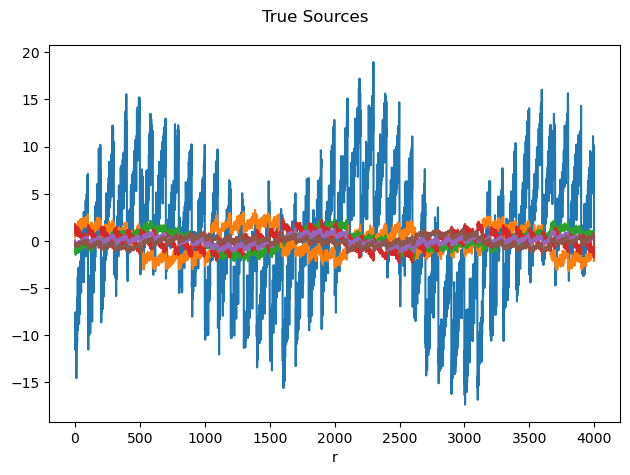

In [75]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv('mixed_signals.csv')
data = df.drop(df.columns[0],axis=1)
plt.plot(data)
plt.xlabel('r')
plt.suptitle('True Sources')
plt.tight_layout()
plt.show()

After seperate to plot 3 columns we have:

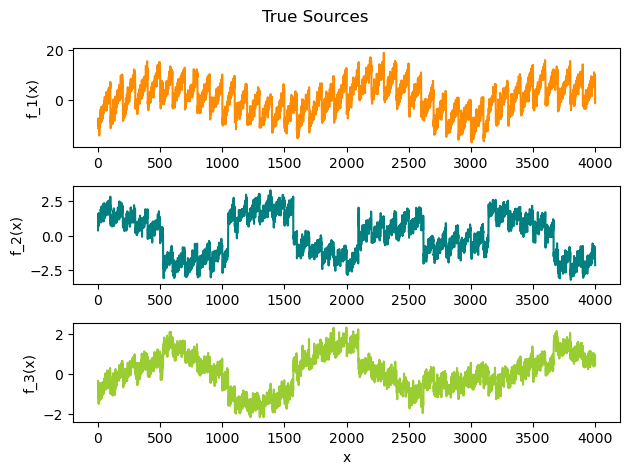

In [76]:
for i in range(3):
    plt.subplot(3,1,i+1)
    plt.plot(data.iloc[:,i], color = colors[i])
    # Plot config
    plt.ylabel(f'f_{i+1}(x)')

# Plot config cont.
plt.xlabel('x')
plt.suptitle('True Sources')
plt.tight_layout()
plt.show()

2. Recover unobserved source signals from observed mixed signals.  You may use methods such as ICA, PCA, and other dimensionality reduction algorithms.  Plot recovered source signals over time. Compare other results to PCA and discuss. 

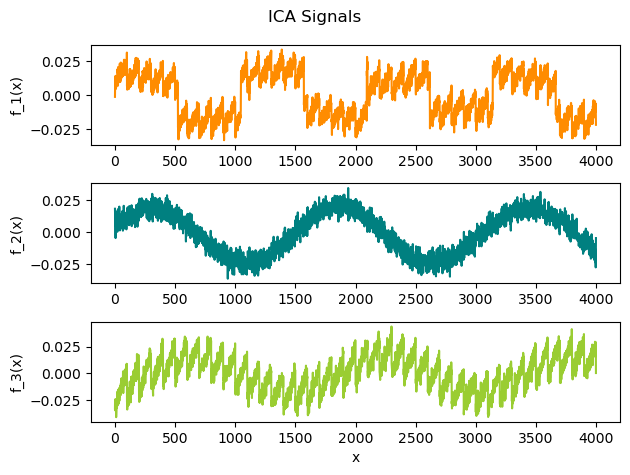

In [78]:
# Import packages
from sklearn.decomposition import FastICA
import warnings
warnings.filterwarnings('ignore')
# Create FastICA object
ICA = FastICA(n_components = 3, tol = 1e-12, max_iter = 1000)
# Implement ICA
ICA_signals = ICA.fit_transform(data)

# Plot data
colors = ['darkorange', 'teal', 'yellowgreen']
for i in range(3):
    plt.subplot(3,1,i+1)
    plt.plot(ICA_signals[:,i], color = colors[i])
    # Plot config
    plt.ylabel(f'f_{i+1}(x)')
# Plot config cont.
plt.xlabel('x')
plt.suptitle('ICA Signals')
plt.tight_layout()
plt.show()

In [77]:
# For comparison, compute PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
H = pca.fit_transform(data)  # Reconstruct signals based on orthogonal components

# Plot data
colors = ['darkorange', 'teal', 'yellowgreen']
for i in range(3):
    plt.subplot(3,1,i+1)
    plt.plot(H[:,i], color = colors[i])
    # Plot config
    plt.ylabel(f'f_{i+1}(x)')
# Plot config cont.
plt.xlabel('x')
plt.suptitle('PCA recovered Signals')
plt.tight_layout()
plt.show()

2. Recover unobserved source signals from observed mixed signals.  You may use methods such as ICA, PCA, and other dimensionality reduction algorithms.  Plot recovered source signals over time. Compare other results to PCA and discuss. 

Both PCA and ICA use component 3 to plot. PCA and the sources have similarities to the first two components. PCA output is up to 20 while ICA is up to 0.025. We can conclude that the PCA compresses data, whereas ICA separates it.


3.  Write down the equations for each of the recovered source signals.  These are known mathematical functions. 